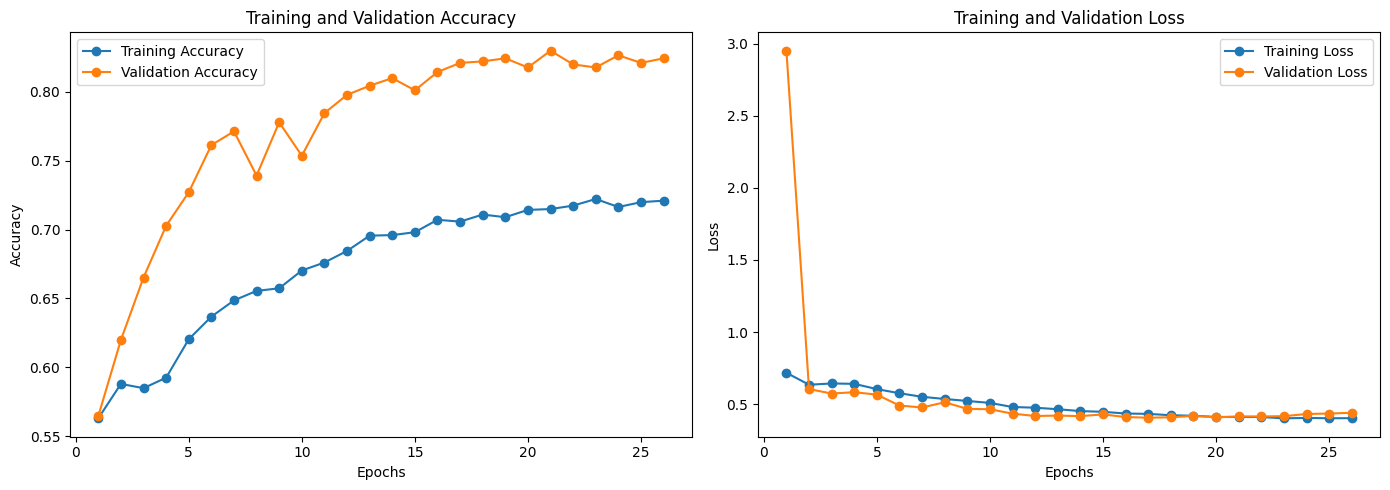

29/29 ━━━━━━━━━━━━━━━━━━━━ 28s 378ms/step


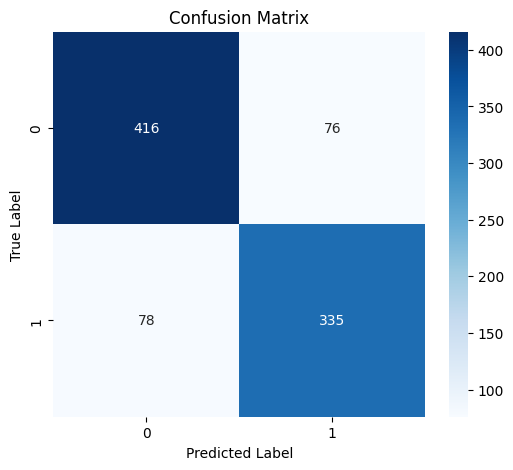


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       492
           1       0.82      0.81      0.81       413

    accuracy                           0.83       905
   macro avg       0.83      0.83      0.83       905
weighted avg       0.83      0.83      0.83       905



In [3]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report

def plot_training_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(14, 5))

    # Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, label='Training Accuracy', marker='o')
    plt.plot(epochs, val_acc, label='Validation Accuracy', marker='o')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, label='Training Loss', marker='o')
    plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(model, test_X, test_Y):
    y_pred = model.predict(test_X)
    y_pred_labels = np.argmax(y_pred, axis=1)
    y_true_labels = np.argmax(test_Y, axis=1)

    cm = confusion_matrix(y_true_labels, y_pred_labels)
    class_names = [str(i) for i in range(test_Y.shape[1])]

    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

    print("\nClassification Report:")
    print(classification_report(y_true_labels, y_pred_labels, target_names=class_names))

def main():
    # === Nhập đường dẫn tại đây ===
    history_path = "trained_model/model ver 3/normal/accuracy_normal.pickle"
    model_path = "trained_model/model ver 3/normal/trained_model_after_normal.keras"
    test_batch_path = "train_data/normal/normaltest_batches/test_batch.pickle"

    # === Load dữ liệu ===
    with open(history_path, 'rb') as f:
        history = pkl.load(f)

    model = keras.models.load_model(model_path)

    with open(test_batch_path, 'rb') as f:
        test_batch = pkl.load(f)
    test_X = test_batch['data']
    test_Y = test_batch['labels']

    # === Vẽ biểu đồ và tính toán ===
    plot_training_history(history)
    plot_confusion_matrix(model, test_X, test_Y)

if __name__ == "__main__":
    main()
